# Importing Essential Data

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno 

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [48]:
groups_raw = pd.read_csv("data/EmazeMeGroups.csv")
groups_raw.head()

,GroupID,GroupName,Admin,Privecy,Visibility,priority,varified,AssociatedGroupsJson,ModeratorsJson,DateCreated,DateUpdated,AboutGroup,EmazeSite,GroupCoverUrl,GroupPhotoUrl,SiteThumnail
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,NaN,NaN,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group of Beitar players,https://emaze.me/diogoverdasca,//userscontent2.emaze.com/userinfo//cover/2dc9...,//userscontent2.emaze.com/userinfo//image/7c4d...,//storage.googleapis.com/userscontent2.emaze.c...
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,NaN,NaN,2020-04-05 10:27:38.0531290,2020-04-05 10:27:38.0531290,Group for fans of Beitar Jerusalem f.c.,NaN,//userscontent2.emaze.com/userinfo//cover/b397...,//userscontent2.emaze.com/userinfo//image/1e5a...,NaN
2,3,newgroupwithdate2,NaN,0,0,0,0,NaN,NaN,2020-04-05 12:00:36.2022096,2020-04-05 12:00:36.2022096,NaN,NaN,NaN,NaN,NaN
3,4,another-group,NaN,0,0,0,0,NaN,NaN,2020-04-20 08:57:01.8046276,2020-04-20 08:57:01.8046276,NaN,NaN,NaN,NaN,NaN
4,5,"""""",NaN,0,0,0,0,NaN,NaN,2020-04-20 10:44:39.2241056,2020-04-20 10:44:39.2241056,NaN,NaN,NaN,NaN,NaN


In [49]:
followers_raw = pd.read_csv("data/EmazeMeGroupFollowers.csv")
followers_raw.head()

,FollowId,FollowerId,EmazeMeGroupId,FollowingSince
0,3,240238a0-ce99-4ea7-ac77-eff09fb5eff2,1,0001-01-03 00:00:00.000
1,4,240238a0-ce99-4ea7-ac77-eff09fb5eff2,2,0001-01-03 00:00:00.000
2,5,e9477dec-c960-4f11-a563-9781cf8b1c15,1,0001-01-03 00:00:00.000
3,6,e9477dec-c960-4f11-a563-9781cf8b1c15,2,0001-01-03 00:00:00.000
4,7,93aff917-ec28-4201-b1d2-788e275671b2,1,0001-01-03 00:00:00.000


In [50]:
members_raw = pd.read_csv("data/EmazeMeGroupMembers.csv")
members_raw.head()

,FollowId,MemberId,EmazeMeGroupId,MemberSince
0,2,240238a0-ce99-4ea7-ac77-eff09fb5eff2,2,0001-01-03 00:00:00.000
1,3,e9477dec-c960-4f11-a563-9781cf8b1c15,2,0001-01-03 00:00:00.000
2,4,93aff917-ec28-4201-b1d2-788e275671b2,2,0001-01-03 00:00:00.000
3,5,41274e54-612f-4b03-9461-63ae9c74ab07,2,0001-01-03 00:00:00.000
4,6,371088ec-ccd9-4c1e-acb3-6c3b43c84627,2,0001-01-03 00:00:00.000


In [51]:
pending_raw = pd.read_csv("data/EmazeMeGroupPendingMembers.csv")
pending_raw.head()

,FollowId,MemberId,EmazeMeGroupId
0,60,57388fef-9814-4163-8a8a-b676bfb85801,2
1,64,311ff7ca-d05c-4ac3-820a-9c0fc4228d59,2
2,65,c5913a2c-521d-43aa-b031-bb869cea175d,2
3,66,3199cab4-ee6d-4a7e-b629-7c4adf5f5fb4,2
4,67,a0086ebc-c7da-414b-b56f-1db40c1bcdd0,2


# Cleaning and Combining Datasets

In [52]:
members_raw.columns

Index(['FollowId', 'MemberId', 'EmazeMeGroupId', 'MemberSince'], dtype='object')

In [53]:
members = members_raw.drop(members_raw.index[:12])
members.head()

,FollowId,MemberId,EmazeMeGroupId,MemberSince
12,107,69664288-28e9-4cef-b460-47dded38e63e,13,2020-05-17 12:51:48.4864812
13,108,c2f3ffb5-01c4-4669-9579-4bd5569bb24f,13,2020-05-17 12:58:51.1635354
14,109,a328005f-1ca5-4c79-961f-4eab118a32ab,13,2020-05-17 12:59:45.0386588
15,110,41274e54-612f-4b03-9461-63ae9c74ab07,13,2020-05-17 13:09:46.1776610
16,111,09f8c3f4-0528-4d15-aed7-7ff55e68343c,2,2020-05-24 09:44:17.5503198


In [54]:
members.MemberSince = pd.to_datetime(members['MemberSince'])
members.dtypes

FollowId                   int64
MemberId                  object
EmazeMeGroupId             int64
MemberSince       datetime64[ns]
dtype: object

In [55]:
members.rename(columns={'EmazeMeGroupId': 'GroupId', 'MemberId': 'UserId'}, inplace=True)

In [56]:
pending = pending_raw
pending.columns

Index(['FollowId', 'MemberId', 'EmazeMeGroupId'], dtype='object')

In [57]:
pending.rename(columns={'EmazeMeGroupId': 'GroupId', 'MemberId': 'UserId'}, inplace=True)

In [58]:
groups_raw.columns

Index(['GroupID', 'GroupName', 'Admin', 'Privecy', 'Visibility', 'priority',
       'varified', 'AssociatedGroupsJson', 'ModeratorsJson', 'DateCreated',
       'DateUpdated', 'AboutGroup', 'EmazeSite', 'GroupCoverUrl',
       'GroupPhotoUrl', 'SiteThumnail'],
      dtype='object')

In [59]:
groups_raw.DateCreated = pd.to_datetime(groups_raw['DateCreated'])
groups_raw.DateUpdated = pd.to_datetime(groups_raw['DateUpdated'])
print(groups_raw.dtypes)

GroupID                          int64
GroupName                       object
Admin                           object
Privecy                          int64
Visibility                       int64
priority                         int64
varified                         int64
AssociatedGroupsJson           float64
ModeratorsJson                 float64
DateCreated             datetime64[ns]
DateUpdated             datetime64[ns]
AboutGroup                      object
EmazeSite                       object
GroupCoverUrl                   object
GroupPhotoUrl                   object
SiteThumnail                    object
dtype: object


In [60]:
deletegroups = ['AssociatedGroupsJson', 'ModeratorsJson',
                'EmazeSite', 'GroupCoverUrl', 'GroupPhotoUrl', 'SiteThumnail']

groups = groups_raw.drop(deletegroups, axis=1)
groups.rename(columns={'GroupID':'GroupId', 'Admin':'UserId', 'Privecy':'Privacy',
                      'priority':'Priority', 'varified':'Verified'}, inplace=True)
groups.head()

,GroupId,GroupName,UserId,Privacy,Visibility,Priority,Verified,DateCreated,DateUpdated,AboutGroup
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group of Beitar players
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1,0,0,0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group for fans of Beitar Jerusalem f.c.
2,3,newgroupwithdate2,NaN,0,0,0,0,2020-04-05 12:00:36.202209600,2020-04-05 12:00:36.202209600,NaN
3,4,another-group,NaN,0,0,0,0,2020-04-20 08:57:01.804627600,2020-04-20 08:57:01.804627600,NaN
4,5,"""""",NaN,0,0,0,0,2020-04-20 10:44:39.224105600,2020-04-20 10:44:39.224105600,NaN


In [61]:
data = pd.concat([groups, members, pending],ignore_index=True)
data.head()

,GroupId,GroupName,UserId,Privacy,Visibility,Priority,Verified,DateCreated,DateUpdated,AboutGroup,FollowId,MemberSince
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1.0,0.0,0.0,0.0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group of Beitar players,NaN,NaT
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1.0,0.0,0.0,0.0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group for fans of Beitar Jerusalem f.c.,NaN,NaT
2,3,newgroupwithdate2,NaN,0.0,0.0,0.0,0.0,2020-04-05 12:00:36.202209600,2020-04-05 12:00:36.202209600,NaN,NaN,NaT
3,4,another-group,NaN,0.0,0.0,0.0,0.0,2020-04-20 08:57:01.804627600,2020-04-20 08:57:01.804627600,NaN,NaN,NaT
4,5,"""""",NaN,0.0,0.0,0.0,0.0,2020-04-20 10:44:39.224105600,2020-04-20 10:44:39.224105600,NaN,NaN,NaT


# Initial Exploratory Data Analysis

In [63]:
data.shape

(384, 12)

In [64]:
print(data.isnull().sum())

GroupId          0
GroupName      346
UserId           5
Privacy        346
Visibility     346
Priority       346
Verified       346
DateCreated    346
DateUpdated    346
AboutGroup     370
FollowId        38
MemberSince     84
dtype: int64


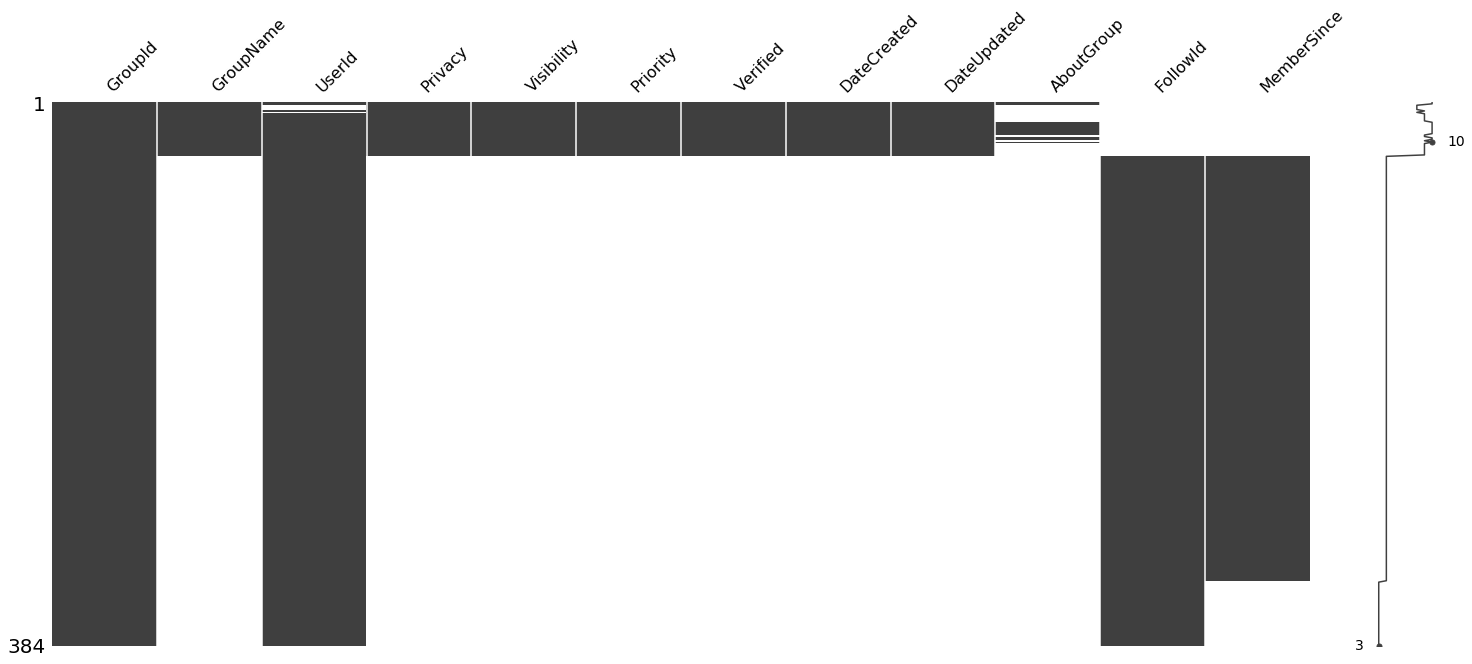

In [65]:
msno.matrix(data) 

In [66]:
#Show privacy breakdown of groups
privacy = data.set_index('Privacy')
mapping = {0.0: 'Public', 1.0: 'Closed', 2.0: 'Private'}
privacy.groupby(mapping).count()

,GroupId,GroupName,UserId,Visibility,Priority,Verified,DateCreated,DateUpdated,AboutGroup,FollowId,MemberSince
Closed,3,3,3,3,3,3,3,3,2,0,0
Private,1,1,1,1,1,1,1,1,0,0,0
Public,34,34,29,34,34,34,34,34,12,0,0


In [67]:
#Show visibility breakdown of groups
visibility = data.set_index('Visibility')
mapping = {0.0: 'Visible', 1.0: 'Hidden'}
visibility.groupby(mapping).count()

,GroupId,GroupName,UserId,Privacy,Priority,Verified,DateCreated,DateUpdated,AboutGroup,FollowId,MemberSince
Visible,38,38,33,38,38,38,38,38,14,0,0


In [70]:
#Show how many groups are verified
verified = data.set_index('Verified')
mapping = {0.0: 'Not Verified', 1.0: 'Verified'}
verified.groupby(mapping).count()

,GroupId,GroupName,UserId,Privacy,Visibility,Priority,DateCreated,DateUpdated,AboutGroup,FollowId,MemberSince
Not Verified,38,38,33,38,38,38,38,38,14,0,0


In [72]:
#Number of users in each group
data.groupby('GroupId')['UserId'].count().sort_values(ascending=False).head()

GroupId
19    80
22    57
2     46
1     27
24    25
Name: UserId, dtype: int64

In [73]:
#Number of groups a person is in
data.groupby('UserId')['GroupId'].count().sort_values(ascending=False).head()

UserId
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c    19
886b35c1-7e9d-46da-b9ff-d4099d142194    14
db2995b1-3963-4631-b702-65d02fca3b81     4
a328005f-1ca5-4c79-961f-4eab118a32ab     3
18d5fe79-926b-489c-9dc3-406641760d0d     3
Name: GroupId, dtype: int64

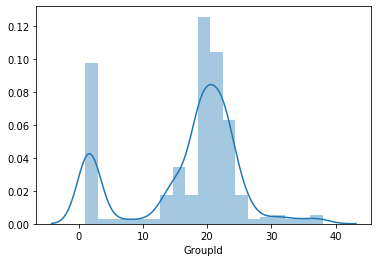

In [74]:
#Shows how many times each group is listed in the dataframe (and how many members it has)
sns.distplot(data.GroupId)

# Adding and Manipulating Time Data

In [75]:
time_raw = pd.read_csv('data/TimeOnPages.csv')
time_raw.head()

,Id,PageType,PageId,UserId,SessionId,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,IPAdress,ScrollDistance,CountryCode
0,1,profile,studio.recrearte,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,17ed51e0-636f-4d06-8a83-bcf669dfbb69,300,2020-06-11 12:52:07.3031009,2020-06-11 12:57:07.5647985,0.0,NaN,0,NaN
1,2,profile,studio.recrearte,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,f1a3dc6c-9fab-4f55-a79e-47a200867cd5,450,2020-06-11 12:57:22.9161638,2020-06-11 13:04:53.3181095,0.0,NaN,0,NaN
2,3,group,Soccer_Players,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,d8229e15-5afa-42ba-acb3-32596fe4aa89,751,2020-06-11 13:05:24.8606073,2020-06-11 13:17:56.7933590,0.0,NaN,0,NaN
3,4,group,Soccer_Players,NaN,e2a8b9fe-2196-4fc5-8644-e2f2c4a42b91,363,2020-06-11 13:18:15.4045611,2020-06-11 13:24:18.6984282,0.0,NaN,0,NaN
4,5,group,aaaassss,db2995b1-3963-4631-b702-65d02fca3b81,91b4b752-ad8f-4005-9d5c-4cc609fe2f48,0,2020-06-11 14:34:01.6480697,2020-06-11 14:34:01.6480697,0.0,NaN,0,NaN


In [76]:
time1 = time_raw[time_raw.PageType == 'group']
time1.head()

,Id,PageType,PageId,UserId,SessionId,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,IPAdress,ScrollDistance,CountryCode
2,3,group,Soccer_Players,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,d8229e15-5afa-42ba-acb3-32596fe4aa89,751,2020-06-11 13:05:24.8606073,2020-06-11 13:17:56.7933590,0.0,NaN,0,NaN
3,4,group,Soccer_Players,NaN,e2a8b9fe-2196-4fc5-8644-e2f2c4a42b91,363,2020-06-11 13:18:15.4045611,2020-06-11 13:24:18.6984282,0.0,NaN,0,NaN
4,5,group,aaaassss,db2995b1-3963-4631-b702-65d02fca3b81,91b4b752-ad8f-4005-9d5c-4cc609fe2f48,0,2020-06-11 14:34:01.6480697,2020-06-11 14:34:01.6480697,0.0,NaN,0,NaN
152,153,group,TEST12,db2995b1-3963-4631-b702-65d02fca3b81,53a954c3-c12f-48df-883d-b305b0d665c7,0,2020-06-14 07:12:59.1934044,2020-06-14 07:12:59.1934044,0.0,NaN,0,NaN
153,154,group,TEST12,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,b47cdd87-a831-4ecd-9c39-d4160d1ca7e7,0,2020-06-14 07:13:29.6667553,2020-06-14 07:13:29.6667553,0.0,NaN,0,NaN


In [85]:
deletegroups = ['PageType', 'SessionId']
time2 = time1.drop(deletegroups, axis=1)
time2.rename(columns={'Id': 'GroupId', 'PageId':'GroupName', 'IPAdress':'IPAddress'}, inplace=True)
time2

,GroupId,GroupName,UserId,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,IPAddress,ScrollDistance,CountryCode
2,3,Soccer_Players,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,751,2020-06-11 13:05:24.8606073,2020-06-11 13:17:56.7933590,0.000,NaN,0,NaN
3,4,Soccer_Players,NaN,363,2020-06-11 13:18:15.4045611,2020-06-11 13:24:18.6984282,0.000,NaN,0,NaN
4,5,aaaassss,db2995b1-3963-4631-b702-65d02fca3b81,0,2020-06-11 14:34:01.6480697,2020-06-11 14:34:01.6480697,0.000,NaN,0,NaN
152,153,TEST12,db2995b1-3963-4631-b702-65d02fca3b81,0,2020-06-14 07:12:59.1934044,2020-06-14 07:12:59.1934044,0.000,NaN,0,NaN
153,154,TEST12,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:29.6667553,2020-06-14 07:13:29.6667553,0.000,NaN,0,NaN
154,155,3,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:39.5048669,2020-06-14 07:13:39.5048669,0.000,NaN,0,NaN
155,156,4,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:47.4161506,2020-06-14 07:13:47.4161506,0.000,NaN,0,NaN
156,157,5,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:51.3315946,2020-06-14 07:13:51.3315946,0.000,NaN,0,NaN
157,158,6,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:57.8847530,2020-06-14 07:13:57.8847530,0.000,NaN,0,NaN
158,159,7,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:14:03.2027480,2020-06-14 07:14:03.2027480,0.000,NaN,0,NaN


In [86]:
#Deleting rows with groups that have no activity

deleterows = [2,3,4,152,153,205,209,210,215,216,217,220,221,223,225,226,227,228,229,230,
                 232,233,234,315,316,341,343,344,393,397,881]
time = time2.drop(deleterows)
time.head()

,GroupId,GroupName,UserId,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,IPAddress,ScrollDistance,CountryCode
154,155,3,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:39.5048669,2020-06-14 07:13:39.5048669,0.0,NaN,0,NaN
155,156,4,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:47.4161506,2020-06-14 07:13:47.4161506,0.0,NaN,0,NaN
156,157,5,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:51.3315946,2020-06-14 07:13:51.3315946,0.0,NaN,0,NaN
157,158,6,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:13:57.8847530,2020-06-14 07:13:57.8847530,0.0,NaN,0,NaN
158,159,7,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0,2020-06-14 07:14:03.2027480,2020-06-14 07:14:03.2027480,0.0,NaN,0,NaN


In [87]:
data1 = pd.concat([data, time],ignore_index=True)
data1.head()

,GroupId,GroupName,UserId,Privacy,Visibility,Priority,Verified,DateCreated,DateUpdated,AboutGroup,FollowId,MemberSince,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,IPAddress,ScrollDistance,CountryCode
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1.0,0.0,0.0,0.0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group of Beitar players,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,1.0,0.0,0.0,0.0,2020-04-05 10:27:38.053129000,2020-04-05 10:27:38.053129000,Group for fans of Beitar Jerusalem f.c.,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,newgroupwithdate2,NaN,0.0,0.0,0.0,0.0,2020-04-05 12:00:36.202209600,2020-04-05 12:00:36.202209600,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,another-group,NaN,0.0,0.0,0.0,0.0,2020-04-20 08:57:01.804627600,2020-04-20 08:57:01.804627600,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,"""""",NaN,0.0,0.0,0.0,0.0,2020-04-20 10:44:39.224105600,2020-04-20 10:44:39.224105600,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


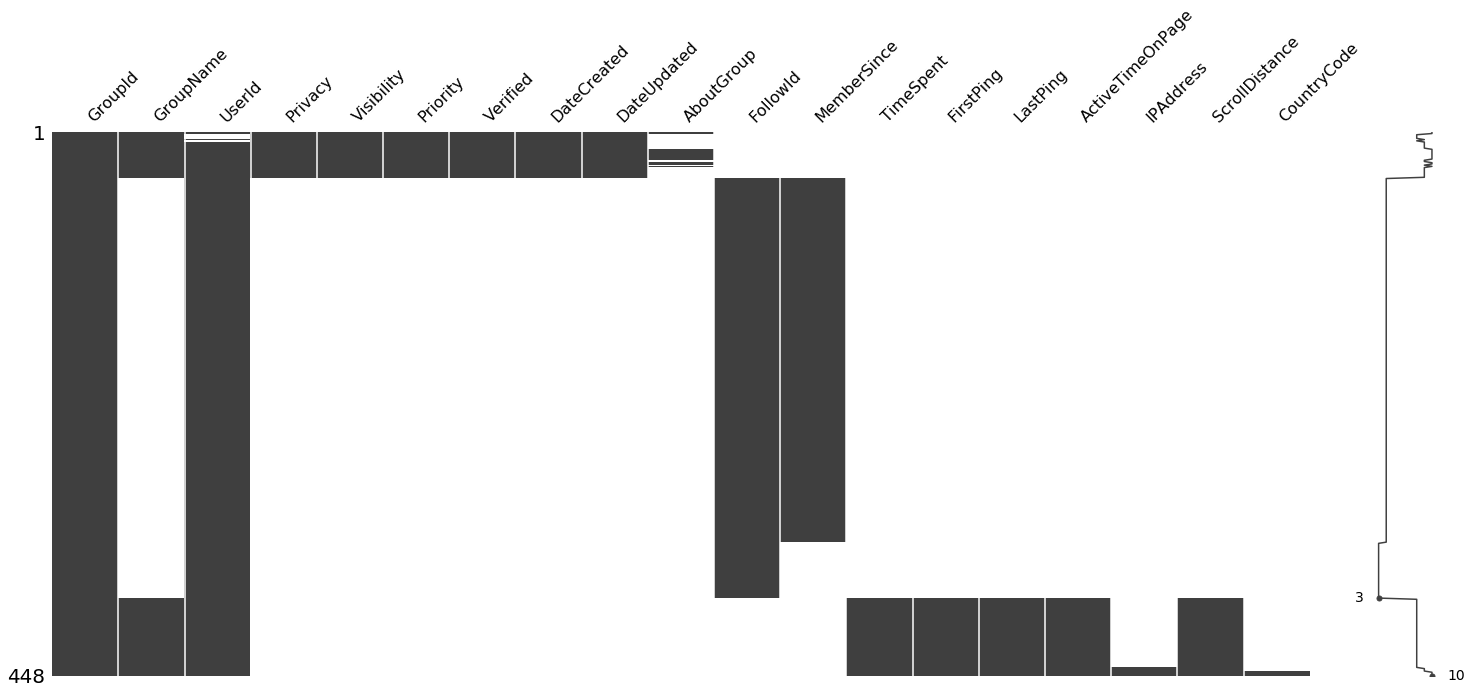

In [88]:
msno.matrix(data1) 

In [96]:
deletegroups = ['Privacy', 'Visibility', 'Priority', 'DateCreated', 'DateUpdated', 
                'AboutGroup', 'FollowId', 'IPAddress', 'CountryCode']
timedata = data1.drop(deletegroups, axis=1)
timedata.head()

,GroupId,GroupName,UserId,Verified,MemberSince,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,ScrollDistance
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0.0,NaT,NaN,NaN,NaN,NaN,NaN
1,2,BeitarFans,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0.0,NaT,NaN,NaN,NaN,NaN,NaN
2,3,newgroupwithdate2,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN
3,4,another-group,NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN
4,5,"""""",NaN,0.0,NaT,NaN,NaN,NaN,NaN,NaN


In [97]:
timedata.shape

(448, 10)

In [98]:
print(timedata.isnull().sum())

GroupId               0
GroupName           346
UserId                5
Verified            410
MemberSince         148
TimeSpent           384
FirstPing           384
LastPing            384
ActiveTimeOnPage    384
ScrollDistance      384
dtype: int64


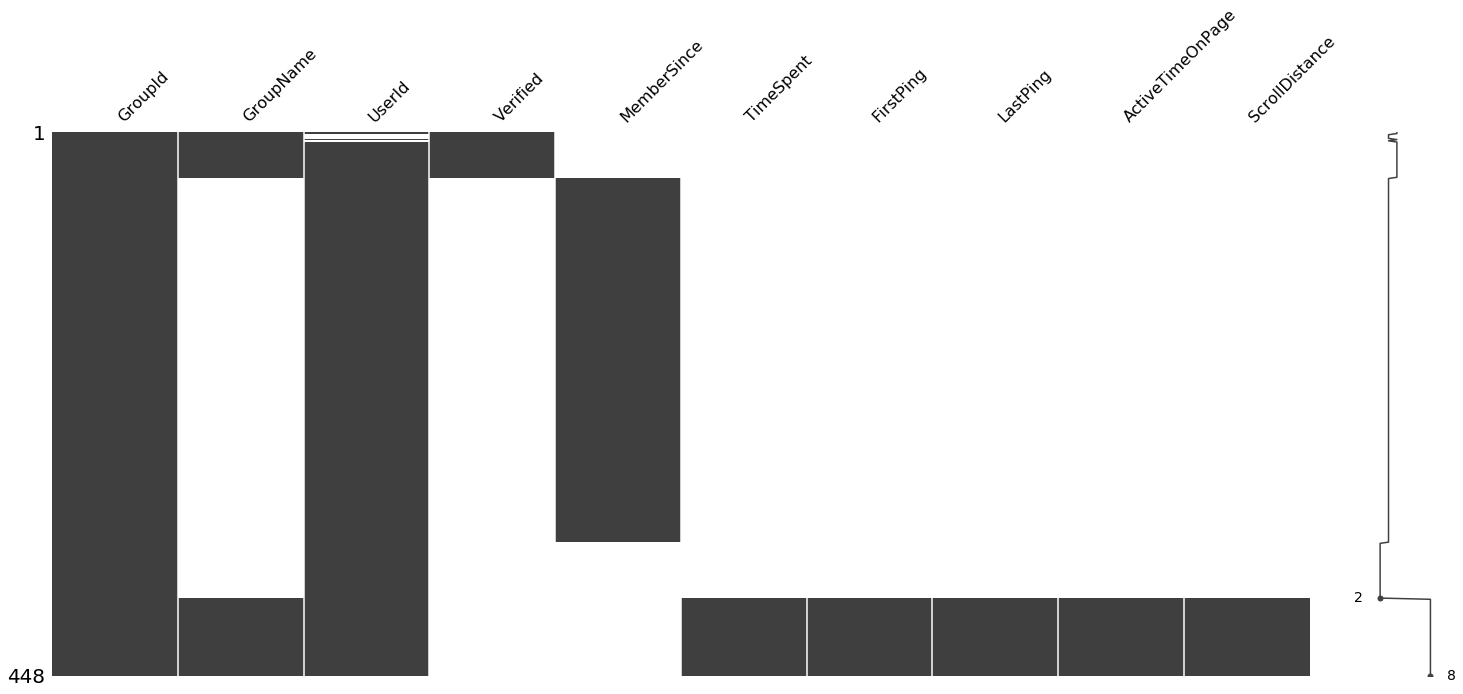

In [99]:
msno.matrix(timedata) 

In [100]:
timedata[['GroupId']] = timedata[['GroupId']].apply(pd.to_numeric)

In [101]:
timedata.dtypes

GroupId                      int64
GroupName                   object
UserId                      object
Verified                   float64
MemberSince         datetime64[ns]
TimeSpent                  float64
FirstPing                   object
LastPing                    object
ActiveTimeOnPage           float64
ScrollDistance             float64
dtype: object

In [102]:
timedata.GroupId.unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,  155,  156,  157,  158,  159,  160,
        161,  162,  163,  164,  165,  166,  167,  168,  169,  170,  171,
        172,  173,  174,  175,  176,  177,  178,  179,  180,  181,  182,
        183,  184,  185,  186,  187,  188,  189,  190,  191,  192,  193,
        194,  195,  196,  197,  198,  199,  200,  201,  202,  203,  204,
        208,  236,  237,  247,  312,  318,  319,  364,  383,  390, 1089,
       1095, 1135, 1165])

In [103]:
time = timedata.sort_values(by ='GroupId')
time

,GroupId,GroupName,UserId,Verified,MemberSince,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,ScrollDistance
0,1,BeitarJerusalem,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,0.0,NaT,NaN,NaN,NaN,NaN,NaN
44,1,NaN,e36d7ce9-0251-4a77-97d6-38f6e83ff5c5,NaN,2020-05-24 13:54:37.730345100,NaN,NaN,NaN,NaN,NaN
45,1,NaN,00b1d361-9409-4061-a83d-a0c450e5d6d2,NaN,2020-05-24 13:54:58.285213400,NaN,NaN,NaN,NaN,NaN
46,1,NaN,bfe183a3-5a3e-45f0-bb81-a3255e5f4998,NaN,2020-05-24 13:55:05.394172700,NaN,NaN,NaN,NaN,NaN
47,1,NaN,d92655bf-cfec-45b2-98dc-634a9bb01bf2,NaN,2020-05-24 13:55:13.352369700,NaN,NaN,NaN,NaN,NaN
49,1,NaN,064a8e78-6e28-4c75-813f-50b87b1aa7d3,NaN,2020-05-24 13:55:26.209299800,NaN,NaN,NaN,NaN,NaN
50,1,NaN,e1a57616-6a63-48ea-ab79-61668247b336,NaN,2020-05-24 13:55:33.213829400,NaN,NaN,NaN,NaN,NaN
51,1,NaN,07892fa7-530b-4817-bc03-5438eaa3318c,NaN,2020-05-24 13:55:40.335796700,NaN,NaN,NaN,NaN,NaN
52,1,NaN,0eba4dd8-2a9c-4bc7-9787-15138e728531,NaN,2020-05-24 13:55:47.061384000,NaN,NaN,NaN,NaN,NaN
53,1,NaN,0c0cc828-fcca-43d0-8a9c-11938e33a78e,NaN,2020-05-24 13:55:52.993012800,NaN,NaN,NaN,NaN,NaN


In [106]:
#   time.to_csv('data/time.csv', sep='\t', index=False)
#Will allow this dataset to be used in other notebooks (if above code is run)

# Exploratory Data Analysis for Time Data

In [114]:
time['GroupId'].value_counts(ascending=False).head()

19    80
22    57
2     46
1     27
24    25
Name: GroupId, dtype: int64

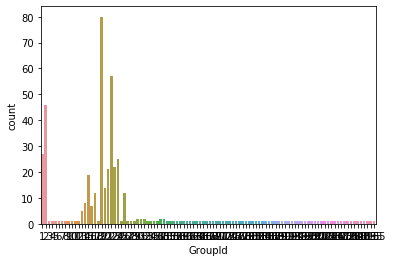

In [115]:
#Shows how many times each group appears in the data (can be used to determine how useful data on a group can be)
popular = sns.countplot(x='GroupId', data=time)
popular

In [116]:
popular_groups = time.sort_values(by ='TimeSpent', ascending=False)
popular_groups.head()

,GroupId,GroupName,UserId,Verified,MemberSince,TimeSpent,FirstPing,LastPing,ActiveTimeOnPage,ScrollDistance
446,1135,1,a328005f-1ca5-4c79-961f-4eab118a32ab,NaN,NaT,17298.0,2020-06-15 13:25:24.1786150,2020-06-15 18:13:42.3387826,98.939,3609.0
447,1165,1,a328005f-1ca5-4c79-961f-4eab118a32ab,NaN,NaT,14238.0,2020-06-15 14:16:19.1141935,2020-06-15 18:13:37.6739374,84.228,883.0
440,319,1,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,NaN,NaT,1579.0,2020-06-14 12:47:12.5129844,2020-06-14 13:13:31.9645534,0.000,0.0
443,390,13,d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c,NaN,NaT,962.0,2020-06-14 14:34:07.9770370,2020-06-14 14:50:10.4359809,68.368,12736.0
437,247,18,db2995b1-3963-4631-b702-65d02fca3b81,NaN,NaT,420.0,2020-06-14 09:00:44.7014992,2020-06-14 09:07:44.8906743,0.000,0.0


In [118]:
#Most popular groups based on average time spent
popular_ts = time.groupby('GroupId')['TimeSpent'].mean().sort_values(ascending=False).head(7)
popular_ts

GroupId
1135    17298.0
1165    14238.0
319      1579.0
390       962.0
247       420.0
1089      302.0
383       210.0
Name: TimeSpent, dtype: float64

In [119]:
#Most active users based on total time spent
active_ts = time.groupby('UserId')['TimeSpent'].sum().sort_values(ascending=False).head(7)
active_ts

UserId
a328005f-1ca5-4c79-961f-4eab118a32ab    31536.0
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c     2991.0
db2995b1-3963-4631-b702-65d02fca3b81      631.0
18d5fe79-926b-489c-9dc3-406641760d0d      332.0
ff4a690a-45cd-468e-8b8d-0d132de3ef6c        0.0
455d1de8-2406-4e64-9625-ec36465eaddb        0.0
55b1e984-3055-460b-aa54-71ad3770324c        0.0
Name: TimeSpent, dtype: float64

In [121]:
#Shows greatest amount of time spent by users on a group
combined_ts = time.groupby(['UserId', 'GroupId'])['TimeSpent'].mean().sort_values(ascending=False).head(7)
combined_ts

UserId                                GroupId
a328005f-1ca5-4c79-961f-4eab118a32ab  1135       17298.0
                                      1165       14238.0
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c  319         1579.0
                                      390          962.0
db2995b1-3963-4631-b702-65d02fca3b81  247          420.0
18d5fe79-926b-489c-9dc3-406641760d0d  1089         302.0
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c  383          210.0
Name: TimeSpent, dtype: float64

In [122]:
#Most popular groups based on average active time on page
popular_at = time.groupby('GroupId')['ActiveTimeOnPage'].mean().sort_values(ascending=False).head(7)
popular_at

GroupId
1135    98.939
1165    84.228
390     68.368
1089    53.732
383     38.277
1095    30.193
364     10.425
Name: ActiveTimeOnPage, dtype: float64

In [123]:
#Most active users based on total active time
active_at = time.groupby('UserId')['ActiveTimeOnPage'].sum().sort_values(ascending=False).head(7)
active_at

UserId
a328005f-1ca5-4c79-961f-4eab118a32ab    183.167
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c    117.070
18d5fe79-926b-489c-9dc3-406641760d0d     83.925
ff4a690a-45cd-468e-8b8d-0d132de3ef6c      0.000
455d1de8-2406-4e64-9625-ec36465eaddb      0.000
57388fef-9814-4163-8a8a-b676bfb85801      0.000
55b1e984-3055-460b-aa54-71ad3770324c      0.000
Name: ActiveTimeOnPage, dtype: float64

In [125]:
#Shows greatest amount of active time spent by users on a group
combined_at = time.groupby(['UserId', 'GroupId'])['ActiveTimeOnPage'].mean().sort_values(ascending=False).head(7)
combined_at

UserId                                GroupId
a328005f-1ca5-4c79-961f-4eab118a32ab  1135       98.939
                                      1165       84.228
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c  390        68.368
18d5fe79-926b-489c-9dc3-406641760d0d  1089       53.732
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c  383        38.277
18d5fe79-926b-489c-9dc3-406641760d0d  1095       30.193
d1f13501-60bf-4dd8-b6e8-c11d2f8eab8c  364        10.425
Name: ActiveTimeOnPage, dtype: float64

In [135]:
#Number of unique users in who have viewed/belong to groups
time['UserId'].nunique()

230

In [136]:
sns.set()

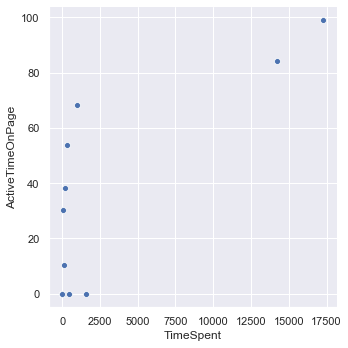

In [138]:
#Should make more different graphs comparing variables





sns.relplot(x="TimeSpent", y="ActiveTimeOnPage", data=time, kind="scatter")

### Things left to do:
- Make more graphics
- Directly answer questions asked
    - Label sections according to questions asked
- Examine popularity of premium user groups (not Emaze.me)